In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#raw = pd.read_csv('C:\\Users\\ADMIN\\Documents\\Datasets\\BigBasket\\bigBasketCSV.csv')
raw = pd.read_csv('C:\\Users\\Mk\\Documents\\Datasets\\BigBasket\\bigBasket.csv')

In [4]:
raw.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014,Other Sauces
1,M09736,6468572,15669800,22-09-2014,Cashews
2,M09736,6468572,34989501,22-09-2014,Other Dals
3,M09736,6468572,7572303,22-09-2014,Namkeen
4,M09736,6468572,15669856,22-09-2014,Sugar


#Data Cleaning

In [5]:
#Finding NaN
NanCount = raw.isna().sum()
NanCount

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [6]:
#Finding mistake in text columns
UniqueItems = raw['Description'].unique()
UniqueItems.shape

(216,)

In [7]:
#finding No of transactions
CntTrans = raw['Order'].unique()

In [8]:
CntUniqueItems = np.zeros(len(UniqueItems))
for i in range(len(UniqueItems)):
    CntUniqueItems[i] = raw[raw['Description'] == UniqueItems[i]]['Description'].count()

In [9]:
#plt.hist(raw['Description'], bins=50)

In [10]:
UniqueItems.sort()

In [11]:
#for i in range(len(UniqueItems)):
#    print(UniqueItems[i],'\n')

Modify following Items
Festive Gift Pack, Festive Gift Packs 
Soup, Soups
Toilet Cleaners, Toilet Cleaning

In [12]:
# Replace item names
#UniqueItems = raw['Description'].unique()
raw_process = raw.copy()
raw_process['Description'] = raw_process['Description'].replace('Festive Gift Pack', 'Festive Gift Packs')
raw_process['Description'] = raw_process['Description'].replace('Soup', 'Soups')
raw_process['Description'] = raw_process['Description'].replace('Toilet Cleaning', 'Toilet Cleaners')


In [13]:
#Change 'Created On' to Date Format YYYY-MM-DD
raw_process['Created On'] = pd.to_datetime(raw['Created On'], dayfirst=True)

In [14]:
#Check dates are consecutive
raw_process['Created On Temp'] = raw_process['Created On']
raw_process['Created On Temp'] = raw_process['Created On'][1:]
if ~(len(raw_process[raw_process['Created On Temp']<raw_process['Created On']])):
    print('Dates are consecutive')
else:
    print('Dates are not consecutive')

Dates are consecutive


#Data Cleaning is completed

# Product Wise Analysis
## Data Preparation

In [15]:
y = pd.get_dummies(raw_process[['Order', 'Description']],  dtype=float, prefix='')

In [16]:
y.head()

,Order,_After Shave,_Agarbatti,_Almonds,_Aluminium Foil & Cling Wrap,_Antiseptics,_Avalakki / Poha,_Ayurvedic,_Ayurvedic Food,_Baby Care Accessories,...,_Vanaspati,_Veg & Fruit,_Vermicelli,_Vinegar,_Wafers,_Washing Bars,_Whole Grains,_Whole Spices,_Womens Deo,_Yogurt & Lassi
0,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
OneHotCoded = y.groupby(y['Order']).sum()
OneHotCoded.replace(0,np.nan)

,_After Shave,_Agarbatti,_Almonds,_Aluminium Foil & Cling Wrap,_Antiseptics,_Avalakki / Poha,_Ayurvedic,_Ayurvedic Food,_Baby Care Accessories,_Baby Cereal,...,_Vanaspati,_Veg & Fruit,_Vermicelli,_Vinegar,_Wafers,_Washing Bars,_Whole Grains,_Whole Spices,_Womens Deo,_Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6422636,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6423338,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6423534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6423959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8387967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8388196,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [18]:
OneHotCoded.head()

,_After Shave,_Agarbatti,_Almonds,_Aluminium Foil & Cling Wrap,_Antiseptics,_Avalakki / Poha,_Ayurvedic,_Ayurvedic Food,_Baby Care Accessories,_Baby Cereal,...,_Vanaspati,_Veg & Fruit,_Vermicelli,_Vinegar,_Wafers,_Washing Bars,_Whole Grains,_Whole Spices,_Womens Deo,_Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6422636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6423338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6423534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6423959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#TEST CODE
"""temp = df_new.iloc[2]>0
temp = temp.to_numpy()
df_new.iloc[2,temp]"""

'temp = df_new.iloc[2]>0\ntemp = temp.to_numpy()\ndf_new.iloc[2,temp]'

## Items Moving Frequency

In [20]:
Column_sum = np.zeros(OneHotCoded.shape[1])
Column_avg = np.zeros(OneHotCoded.shape[1])
column_std = np.zeros(OneHotCoded.shape[1])
for i in range(OneHotCoded.shape[1]):
    Column_sum[i] = OneHotCoded.iloc[:,i].sum()
    Column_avg[i] = OneHotCoded.iloc[:,i].mean()
    column_std[i] = OneHotCoded.iloc[:,i].std()

In [21]:
d = {'Items': OneHotCoded.columns, 'Sum': Column_sum, 'Avg': Column_avg, 'STD': column_std}
df_new = pd.DataFrame(d)
df_new = df_new.sort_values(by=['Sum'])
sum_col = df_new['Sum'].to_numpy()
meanval = df_new['Sum'].mean()
stdval = df_new['Sum'].std()

In [22]:
from scipy.stats import norm
probability_pdf = norm.pdf(3, loc=meanval, scale=stdval)


<Axes: xlabel='Items'>

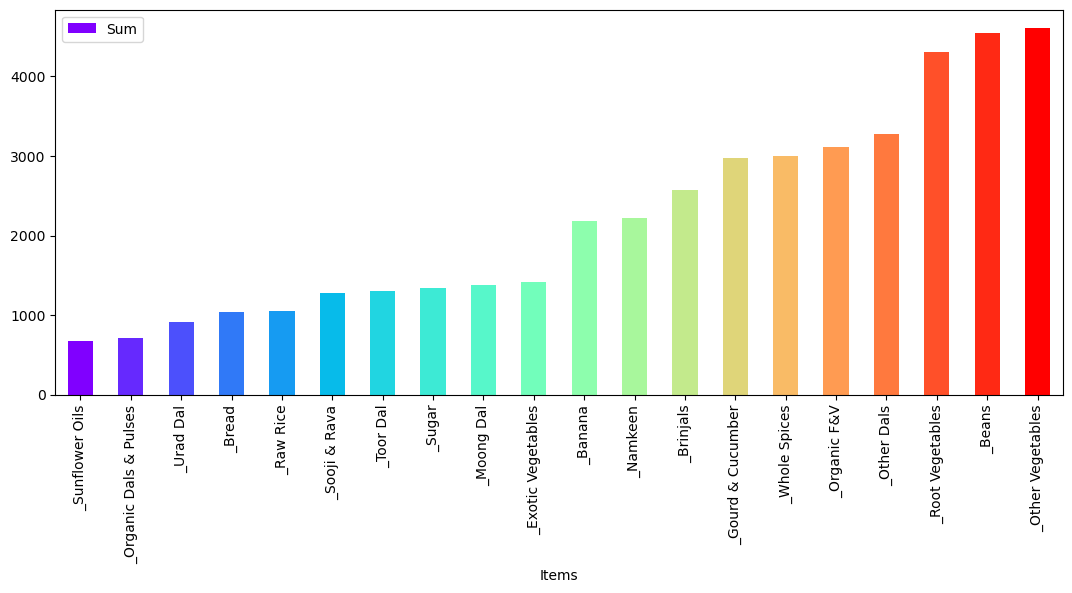

In [23]:
color = plt.cm.rainbow(np.linspace(0, 1, 20))
df_new.tail(20).plot.bar(x='Items', y='Sum',color=color, figsize=(13,5))

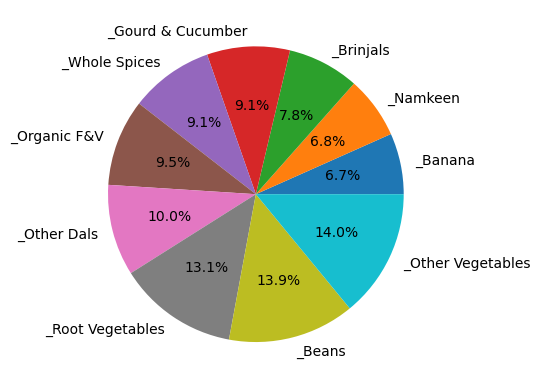

In [24]:
plt.pie(df_new['Sum'].tail(10), labels = df_new['Items'].tail(10), autopct='%1.1f%%')
plt.show() 

<Axes: xlabel='Items'>

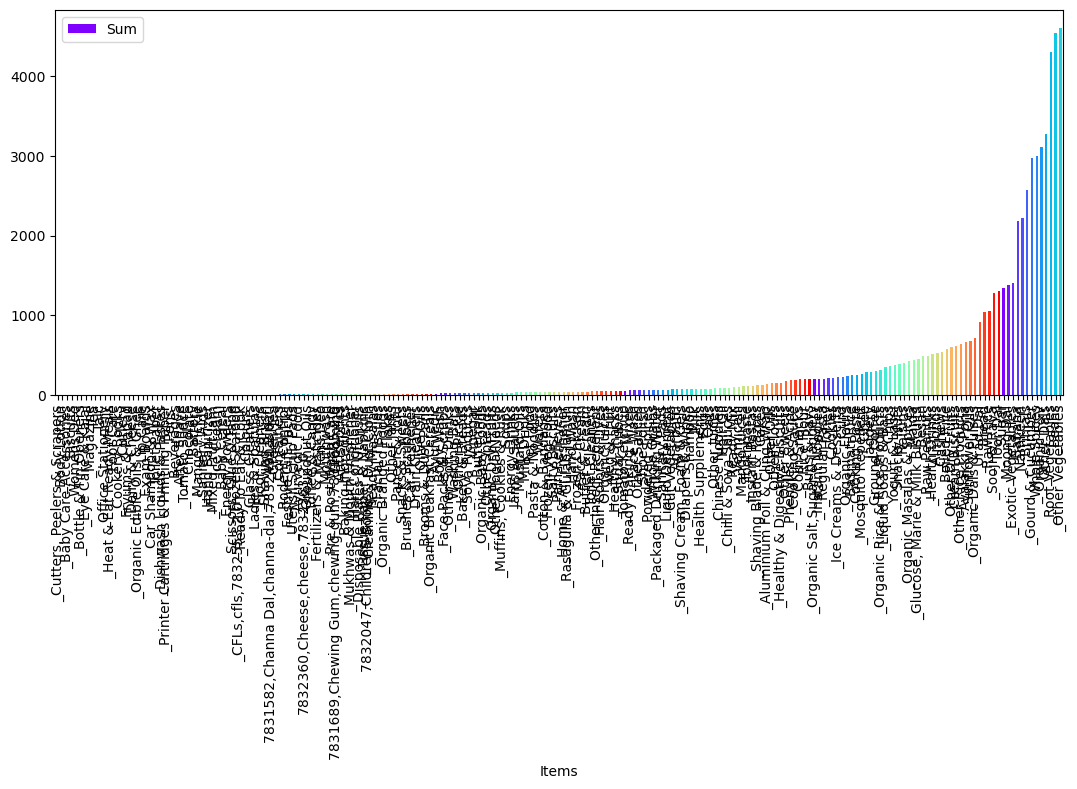

In [25]:
df_new = df_new.sort_values(by=['Sum'])
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df_new.plot.bar(x='Items', y='Sum',color=color, figsize=(13,5))

In [26]:
# Fast, Medium and Slow Moving Items
UT = 2000
LT = 300

FastMoveItems = df_new[df_new['Sum']>UT] #Tune threshold value
#print(FastMoveItems)
MedMoveItems = df_new[(df_new['Sum']<=UT) & (df_new['Sum']>=LT)] #Tune threshold value
#print(MedMoveItems)
SlowMoveItems = df_new[df_new['Sum']<LT] #Tune threshold value
print('Fast Moving Items: ', len(FastMoveItems), 'Avg Moving Items: ', len(MedMoveItems), 'Slow MovingItems: ', len(SlowMoveItems))

Fast Moving Items:  10 Avg Moving Items:  29 Slow MovingItems:  174


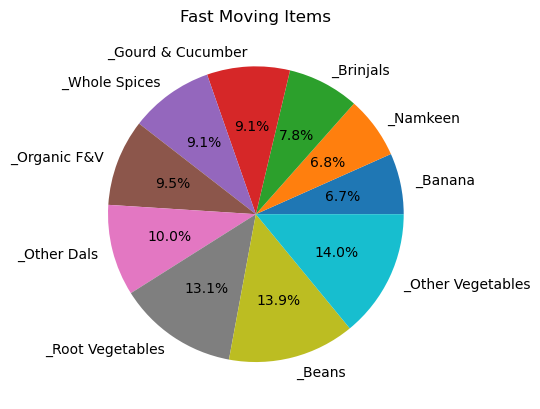

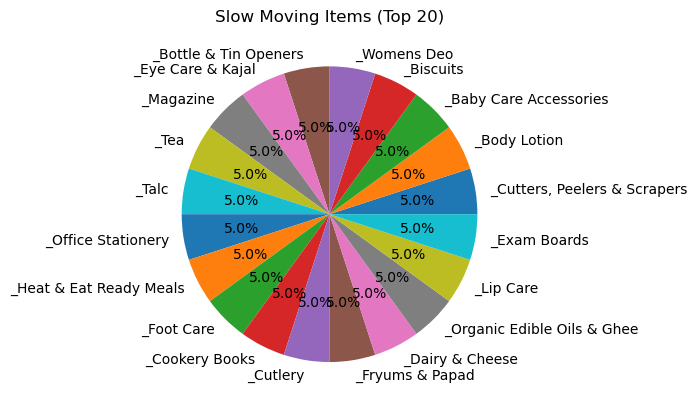

In [27]:
plt.pie(FastMoveItems['Sum'], labels = FastMoveItems['Items'], autopct='%1.1f%%')
plt.title('Fast Moving Items')
plt.show() 

plt.pie(SlowMoveItems['Sum'].head(20), labels = SlowMoveItems['Items'].head(20), autopct='%1.1f%%')
plt.title('Slow Moving Items (Top 20)')
plt.show() 

## Average Sale per month

In [28]:
#raw_process['Temp'] = pd.Timestamp(raw_process['Created On'])
raw_process['Year'] = raw_process['Created On'].dt.year
raw_process['Month'] = raw_process['Created On'].dt.month
raw_process['Day'] = raw_process['Created On'].dt.day
raw_process['Week'] = raw_process['Created On'].dt.isocalendar().week
raw_process['Description'] = "_" + raw_process['Description']
raw_process.head()

,Member,Order,SKU,Created On,Description,Created On Temp,Year,Month,Day,Week
0,M09736,6468572,34993740,2014-09-22,_Other Sauces,NaT,2014,9,22,39
1,M09736,6468572,15669800,2014-09-22,_Cashews,2014-09-22,2014,9,22,39
2,M09736,6468572,34989501,2014-09-22,_Other Dals,2014-09-22,2014,9,22,39
3,M09736,6468572,7572303,2014-09-22,_Namkeen,2014-09-22,2014,9,22,39
4,M09736,6468572,15669856,2014-09-22,_Sugar,2014-09-22,2014,9,22,39


In [29]:
StartDate = min(raw_process['Created On'])
EndDate = max(raw_process['Created On'])
print('Start Date: ', StartDate, 'End Date: ', EndDate)

Start Date:  2011-03-12 00:00:00 End Date:  2014-12-09 00:00:00


In [30]:
#Calculate Total Monthly Sales and Average Sale per day
f = np.array(FastMoveItems['Items'])
m = np.array(MedMoveItems['Items'])
s = np.array(SlowMoveItems['Items'])
TotMonths = np.ceil((EndDate - StartDate)/np.timedelta64(1, 'M')).astype(int)
DateArr = []
# Monthly total sale
MonthlyFastMoveItems = [] #Monthly Total sales Fast Moving item
MonthlyMedMoveItems =  [] #Monthly Total sales Medium Moving item
MonthlySlowMoveItems =  [] #Monthly Total sales Slow Moving item
# Monthly Average per day sale
AvgSaleFMI =[] #Monthly Average sales per day Fast Moving item
AvgSaleMMI =[] #Monthly Average sales per day Medium Moving item
AvgSaleSMI =[] #Monthly Average sales per day Slow Moving item
DaysArr = [] #No of days in month
for i in range(TotMonths):
    CurrMonth = StartDate + pd.DateOffset(months=i)
    CurrMonth = str(CurrMonth.year) + '-' + str(CurrMonth.month)
    NextMonth = StartDate + pd.DateOffset(months=i+1)
    NextMonth = str(NextMonth.year) + '-' + str(NextMonth.month)    
    df_month = raw_process[((raw_process['Created On'] >= CurrMonth) & (raw_process['Created On'] < NextMonth))]
    Days = df_month['Day'].unique()    
    if len(Days) != 0:
        DaysArr.append(len(Days))
        AvgSaleFMI.append(df_month.Description.isin(f).sum()/len(Days))
        AvgSaleMMI.append(df_month.Description.isin(m).sum()/len(Days))
        AvgSaleSMI.append(df_month.Description.isin(s).sum()/len(Days))
        DateArr.append(CurrMonth)
        MonthlyFastMoveItems.append(df_month.Description.isin(f).sum())
        MonthlyMedMoveItems.append(df_month.Description.isin(m).sum())
        MonthlySlowMoveItems.append(df_month.Description.isin(s).sum())
    else:
        print("No Sale data for ", CurrMonth)

AvgSaleFMI = np.array(AvgSaleFMI)
AvgSaleMMI = np.array(AvgSaleMMI)
AvgSaleSMI = np.array(AvgSaleSMI)

No Sale data for  2011-5
No Sale data for  2011-6
No Sale data for  2011-9
No Sale data for  2011-10
No Sale data for  2011-11


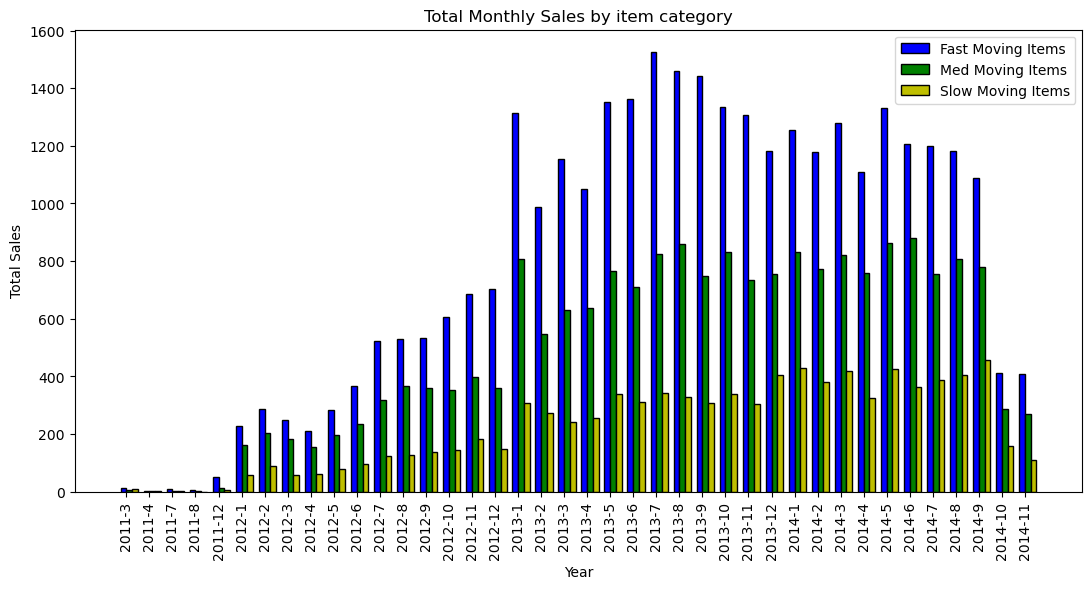

In [31]:
r = np.arange(len(DateArr)) 
width = 0.25  
plt.figure(figsize=(13,6))  
plt.bar(DateArr, MonthlyFastMoveItems, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Fast Moving Items') 
plt.bar(r + width, MonthlyMedMoveItems, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Med Moving Items') 
plt.bar(r + 2*width, MonthlySlowMoveItems, color = 'y', 
        width = width, edgecolor = 'black', 
        label='Slow Moving Items') 
  
plt.xlabel("Year") 
plt.ylabel("Total Sales") 
plt.title("Total Monthly Sales by item category") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,DateArr, rotation = 90) 
plt.legend() 
  
plt.show() 

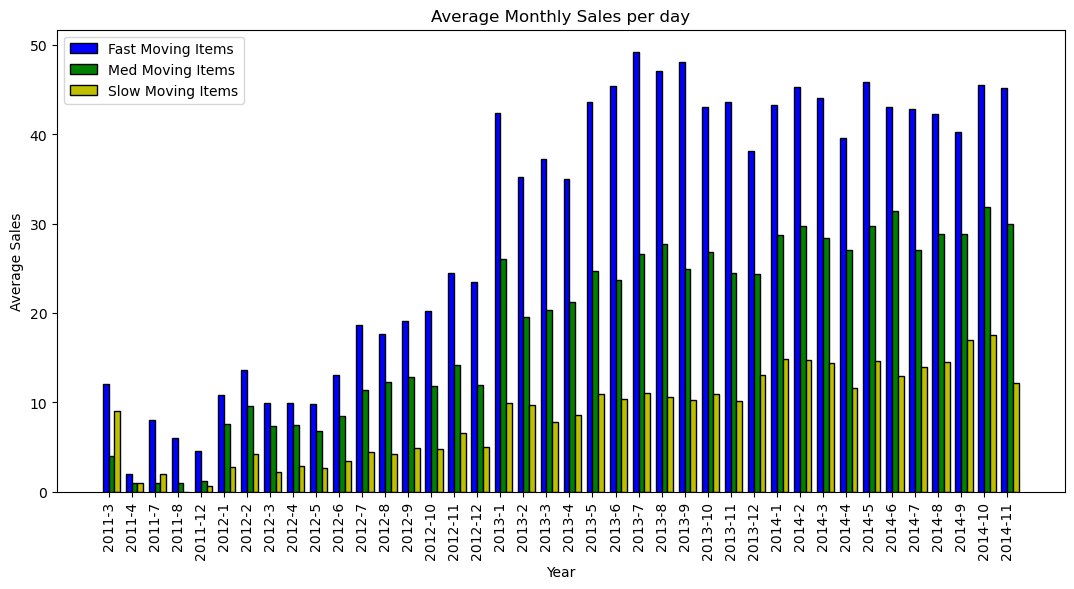

In [32]:
r = np.arange(len(DateArr)) 
width = 0.25  
plt.figure(figsize=(13,6))  
plt.bar(DateArr, AvgSaleFMI, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Fast Moving Items') 
plt.bar(r + width, AvgSaleMMI, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Med Moving Items') 
plt.bar(r + 2*width, AvgSaleSMI, color = 'y', 
        width = width, edgecolor = 'black', 
        label='Slow Moving Items') 
  
plt.xlabel("Year") 
plt.ylabel("Average Sales") 
plt.title("Average Monthly Sales per day") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,DateArr, rotation = 90) 
plt.legend() 
  
plt.show() 

In [33]:
# Percentage change in monthly average sales per day
AvgSaleFMI = np.array(AvgSaleFMI)
AvgSaleMMI = np.array(AvgSaleMMI)
AvgSaleSMI = np.array(AvgSaleSMI)
temp = np.diff(AvgSaleFMI)

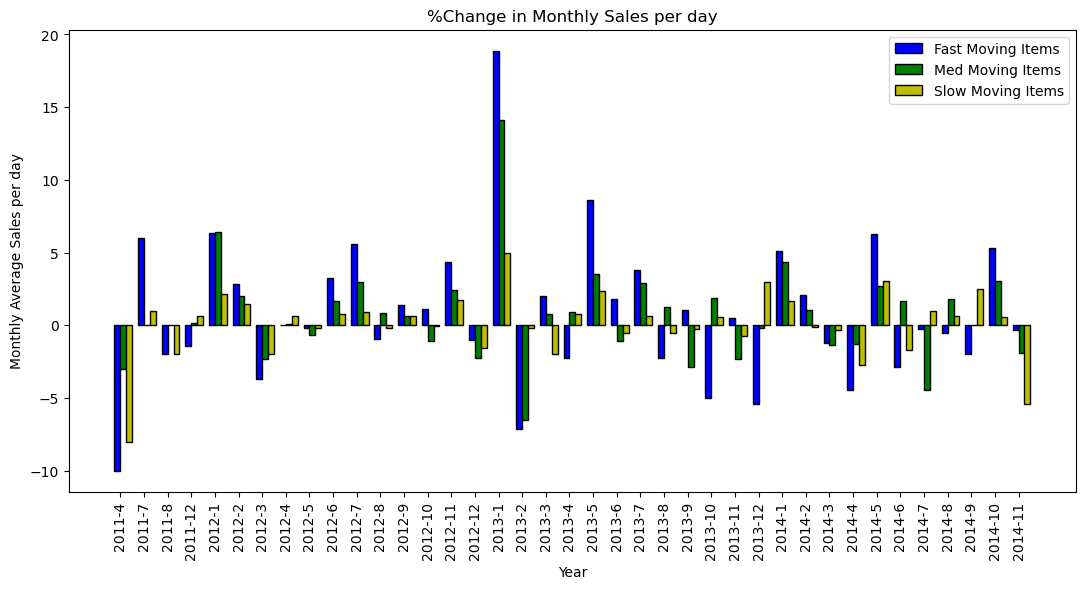

In [34]:
r = np.arange(len(DateArr)-1) 
width = 0.25  
plt.figure(figsize=(13,6))  
plt.bar(r, np.diff(AvgSaleFMI), color = 'b', 
        width = width, edgecolor = 'black', 
        label='Fast Moving Items') 
plt.bar(r + width, np.diff(AvgSaleMMI), color = 'g', 
        width = width, edgecolor = 'black', 
        label='Med Moving Items') 
plt.bar(r + 2*width, np.diff(AvgSaleSMI), color = 'y', 
        width = width, edgecolor = 'black', 
        label='Slow Moving Items') 
  
plt.xlabel("Year") 
plt.ylabel("Monthly Average Sales per day") 
plt.title("%Change in Monthly Sales per day") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2, DateArr[1:], rotation = 90) 
plt.legend() 
  
plt.show() 

In [35]:
TotalSale = [MonthlyFastMoveItems[i] + MonthlyMedMoveItems[i] + MonthlySlowMoveItems[i] for i in range(len(MonthlyFastMoveItems))]

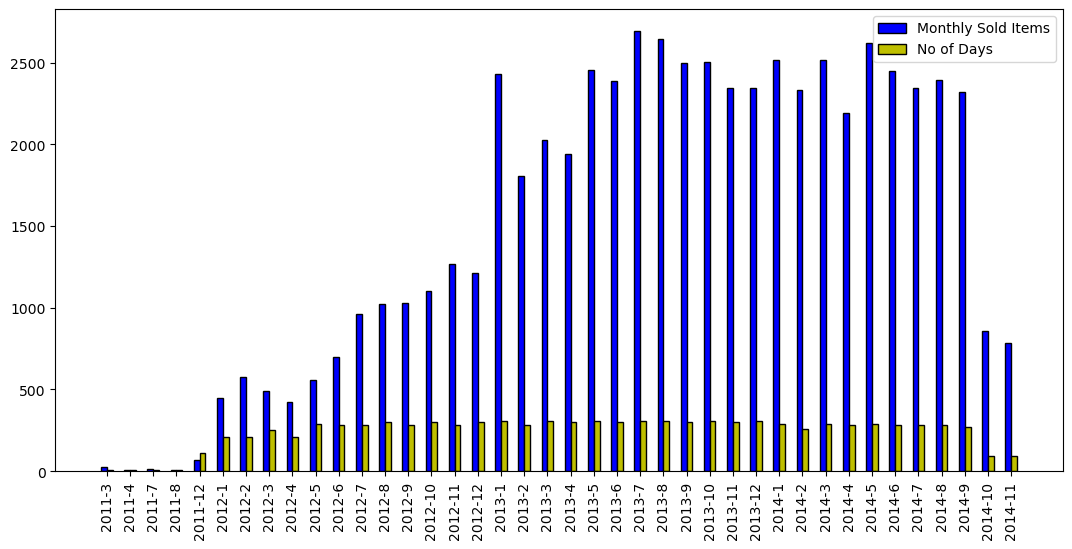

In [36]:
DaysArr = np.array(DaysArr)
r = np.arange(len(DateArr)) 
width = 0.25 

plt.figure(figsize=(13,6))  
plt.bar(r, TotalSale, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Monthly Sold Items')
plt.bar(r+width, DaysArr*10, color = 'y', 
        width = width, edgecolor = 'black', 
        label='No of Days') 
plt.xticks(r + width/2, DateArr, rotation = 90)
plt.legend()
plt.show() 

In [37]:
DateArr =  np.array(DateArr)
MeanDays=DaysArr.mean()
StdDays=DaysArr.std()
print(MeanDays, StdDays)
print("Ignore Months from dataset:", DateArr[DaysArr<(MeanDays-StdDays)]) #Ignore months with days less than (MeanDays-1*StdDays)

24.225 9.50391366753718
Ignore Months from dataset: ['2011-3' '2011-4' '2011-7' '2011-8' '2011-12' '2014-10' '2014-11']


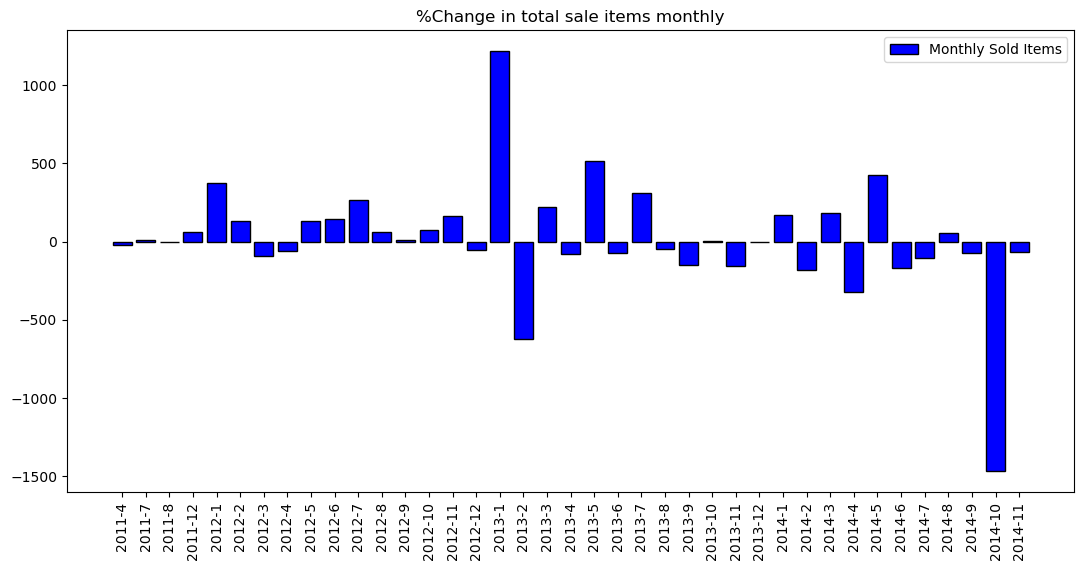

In [38]:
TotalSale = np.array(TotalSale)
prcntDiffSale = np.diff(TotalSale)
r = np.arange(len(DateArr)-1) 
plt.figure(figsize=(13,6))  
plt.bar(r, prcntDiffSale, color = 'b',  edgecolor = 'black', 
        label='Monthly Sold Items')
plt.xticks(r, DateArr[1:], rotation = 90)
plt.legend()
plt.title('%Change in total sale items monthly')
plt.show() 

In [39]:
#Identify Months with steep increase and decrease in sales
MeanSale = prcntDiffSale.mean()
StdSale = prcntDiffSale.std()
Temp = DateArr[1:]
print("Steep Increase in sales months:", Temp[prcntDiffSale>(MeanSale+StdSale)])
print("Steep Decrease in sales months:", Temp[prcntDiffSale<(MeanSale-StdSale)])

Steep Increase in sales months: ['2013-1' '2013-5' '2014-5']
Steep Decrease in sales months: ['2013-2' '2014-10']


# Weekly Analysis

In [122]:
#Calculate Total Weekly Sales and Average Sale per day
f = np.array(FastMoveItems['Items'])
m = np.array(MedMoveItems['Items'])
s = np.array(SlowMoveItems['Items'])
WeeklySale = pd.DataFrame(columns = ['TotalSaleFMI', 'TotalSaleMMI', 'TotalSaleSMI', 'AvgSaleFMI', 'AvgSaleMMI', 
                                     'AvgSaleSMI', 'StartDate', 'Days'], index = np.arange(1,TotWeeks+1))
TotWeeks = np.ceil((EndDate - StartDate)/np.timedelta64(1, 'W')).astype(int)
for i in range(TotWeeks):
    CurrWeek = StartDate + pd.DateOffset(weeks=i)
    CurrWeek = str(CurrWeek.year) + '-' + str(CurrWeek.month) + '-' + str(CurrWeek.day) 
    NextWeek = StartDate + pd.DateOffset(weeks=i+1)
    NextWeek = str(NextWeek.year) + '-' + str(NextWeek.month) + '-' + str(NextWeek.day)  
    df_week = raw_process[((raw_process['Created On'] >= CurrWeek) & (raw_process['Created On'] < NextWeek))]
    Days = df_week['Day'].unique()    
    if len(Days) != 0:
        TempF = df_week.Description.isin(f).sum()
        TempM = df_week.Description.isin(m).sum()
        TempS = df_week.Description.isin(s).sum()
        WeeklySale.iloc[i] = [TempF, TempM, TempS, TempF/len(Days), TempM/len(Days), TempS/len(Days), CurrWeek, len(Days)]
    #else:
        #WeeklySale.drop(i+1)
        #print("No Sale data for ", CurrWeek)

#WeeklySale = WeeklySale.dropna()
WeeklySale['TotalSalesPerDay'] = WeeklySale.iloc[:, 0:3].sum(axis=1)/WeeklySale['Days']

In [123]:
WeeklySale

,TotalSaleFMI,TotalSaleMMI,TotalSaleSMI,AvgSaleFMI,AvgSaleMMI,AvgSaleSMI,StartDate,Days,TotalSalesPerDay
1,12,4,9,12.0,4.0,9.0,2011-3-12,1,25.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,1,1,2.0,1.0,1.0,2011-4-9,1,4.0
...,...,...,...,...,...,...,...,...,...
192,76,54,33,38.0,27.0,16.5,2014-11-8,2,81.5
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,238,170,72,47.6,34.0,14.4,2014-11-29,5,96.0


In [124]:
raw_process

,Member,Order,SKU,Created On,Description,Created On Temp,Year,Month,Day,Week
0,M09736,6468572,34993740,2014-09-22,_Other Sauces,NaT,2014,9,22,39
1,M09736,6468572,15669800,2014-09-22,_Cashews,2014-09-22,2014,9,22,39
2,M09736,6468572,34989501,2014-09-22,_Other Dals,2014-09-22,2014,9,22,39
3,M09736,6468572,7572303,2014-09-22,_Namkeen,2014-09-22,2014,9,22,39
4,M09736,6468572,15669856,2014-09-22,_Sugar,2014-09-22,2014,9,22,39
...,...,...,...,...,...,...,...,...,...,...
62136,M64379,8381435,15670260,2013-11-16,_Organic F&V,2013-11-16,2013,11,16,46
62137,M64379,8381435,15668597,2013-11-16,_Exotic Vegetables,2013-11-16,2013,11,16,46
62138,M64379,8381435,7570555,2013-11-16,_Shoe Polish,2013-11-16,2013,11,16,46
62139,M64379,8381435,7587490,2013-11-16,_Organic Dals & Pulses,2013-11-16,2013,11,16,46


In [92]:
WeeklySale_Eff = WeeklySale[WeeklySale['Days']>(WeeklySale['Days'].mean()-WeeklySale['Days'].std())]

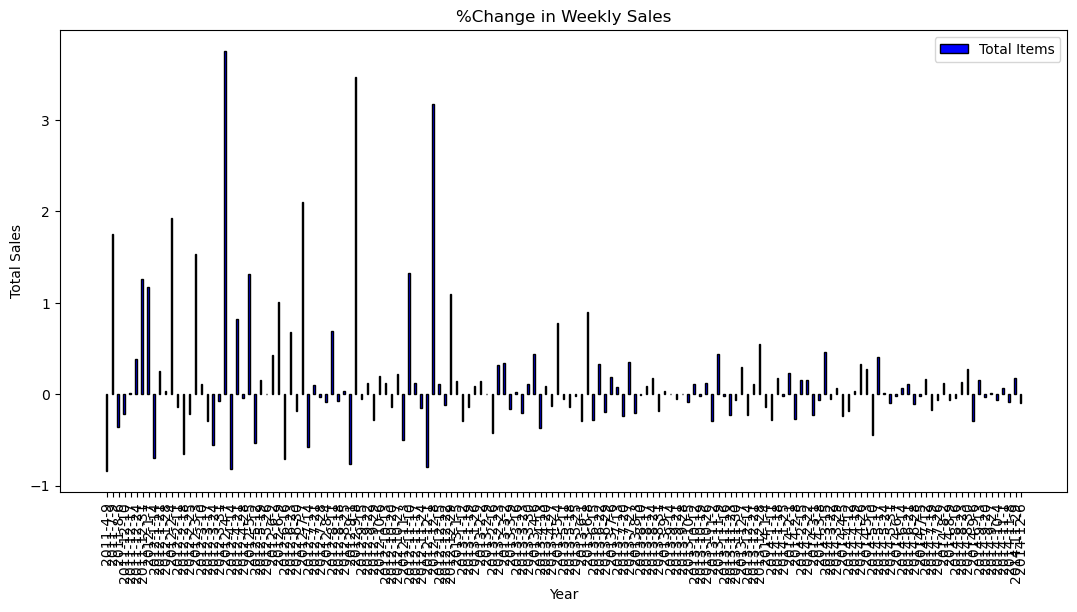

In [103]:
WeeklySale_change = WeeklySale['TotalSalesPerDay'].pct_change()
r = np.arange(len(WeeklySale_change)-1)
width = 0.25  
plt.figure(figsize=(13,6))  
plt.bar(r, WeeklySale_change[1:], color = 'b', 
        width = width, edgecolor = 'black', 
        label='Total Items') 
  
plt.xlabel("Year") 
plt.ylabel("Total Sales") 
plt.title("%Change in Weekly Sales") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,WeeklySale['StartDate'][1:], rotation = 90) 
plt.legend() 
  
plt.show() 

In [112]:
Steep_Inc = WeeklySale[WeeklySale_change > (WeeklySale_change.mean() + WeeklySale_change.std())]

In [111]:
WeeklySale_change.std()

0.6684155254249536

In [116]:
WeeklySale

,TotalSaleFMI,TotalSaleMMI,TotalSaleSMI,AvgSaleFMI,AvgSaleMMI,AvgSaleSMI,StartDate,Days,TotalSalesPerDay
1,12,4,9,12.0,4.0,9.0,2011-3-12,1,25.0
5,2,1,1,2.0,1.0,1.0,2011-4-9,1,4.0
18,8,1,2,8.0,1.0,2.0,2011-7-9,1,11.0
22,6,1,0,6.0,1.0,0.0,2011-8-6,1,7.0
40,8,3,0,4.0,1.5,0.0,2011-12-10,2,5.5
...,...,...,...,...,...,...,...,...,...
187,234,164,101,39.0,27.333333,16.833333,2014-10-4,6,83.166667
191,331,216,76,47.285714,30.857143,10.857143,2014-11-1,7,89.0
192,76,54,33,38.0,27.0,16.5,2014-11-8,2,81.5
195,238,170,72,47.6,34.0,14.4,2014-11-29,5,96.0
